## Import necessary libraries

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load Train and Test data and handle missing values

In [71]:
# Load the train and test data
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [72]:
# handling missing values in Train data
train_data.fillna(value={'class': 'Unknown', 'education_institute': 'Unknown', 'unemployment_reason': 'Unknown',
                         'is_labor_union': 'Unknown', 'under_18_family': 'Unknown', 
                         'veterans_admin_questionnaire': 'Unknown', 'migration_code_change_in_msa': 'Unknown',
                         'migration_prev_sunbelt': 'Unknown', 'migration_code_move_within_reg': 'Unknown',
                         'migration_code_change_in_reg': 'Unknown', 'residence_1_year_ago': 'Unknown',
                         'old_residence_reg': 'Unknown', 'old_residence_state': 'Unknown'}, inplace=True)


In [73]:
# handling missing values in Train data
test_data.fillna(value={'class': 'Unknown', 'education_institute': 'Unknown', 'unemployment_reason': 'Unknown',
                        'is_labor_union': 'Unknown', 'under_18_family': 'Unknown', 
                        'veterans_admin_questionnaire': 'Unknown', 'migration_code_change_in_msa': 'Unknown',
                        'migration_prev_sunbelt': 'Unknown', 'migration_code_move_within_reg': 'Unknown',
                        'migration_code_change_in_reg': 'Unknown', 'residence_1_year_ago': 'Unknown',
                        'old_residence_reg': 'Unknown', 'old_residence_state': 'Unknown'}, inplace=True)



## Use Label encoding to convert categorical values to numerical values

In [74]:
# Encoding categorical variables in training data
label_encoder_train = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = label_encoder_train.fit_transform(train_data[col])

In [75]:
# Encoding categorical variables in test data
label_encoder_test = LabelEncoder()
for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col] = label_encoder_test.fit_transform(test_data[col])

In [76]:
# Separating target variable and features in training data
X_train = train_data.drop(columns=['income_above_limit'])
y_train = train_data['income_above_limit']



In [77]:
# Separating features in test data
X_test = test_data

In [78]:
# Outputting information about the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (209499, 42)
y_train shape: (209499,)
X_test shape: (89786, 42)


## Using Random forest on the Train data 

In [79]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)



In [80]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [81]:
# Predictions on the training data
train_predictions = rf_classifier.predict(X_train)

## Accuracy, Precision, Recall and F1 Score for Train data 

In [82]:
# Evaluate accuracy on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9999809068301042


In [83]:
# Calculate precision, recall, and F1 score on the training data
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1_score = f1_score(y_train, train_predictions)

print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)


Training Precision: 0.9999796442838604
Training Recall: 1.0
Training F1 Score: 0.9999898220383404


## Use model for Test data

In [84]:
# Predictions on the test data
test_predictions = rf_classifier.predict(X_test)


In [85]:
# # Output predictions for the test data
# test_predictions_df = pd.DataFrame({'ID': test_data['ID'], 'income_above_limit': test_predictions})
# test_predictions_df.to_csv("test_predictions.csv", index=False)

## Data Analysis


In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  int32  
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  int32  
 3   education                       89786 non-null  int32  
 4   class                           89786 non-null  int32  
 5   education_institute             89786 non-null  int32  
 6   marital_status                  89786 non-null  int32  
 7   race                            89786 non-null  int32  
 8   is_hispanic                     89786 non-null  int32  
 9   employment_commitment           89786 non-null  int32  
 10  unemployment_reason             89786 non-null  int32  
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [87]:
train_data.describe()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
count,209499.00000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,...,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,104749.00000,34.518728,0.480742,10.029857,5.558079,1.907603,3.003757,3.644223,0.748739,0.691115,...,37.230030,4.081809,1.373563,4.224359,3.746887,1.429277,4.808629,47.842028,1740.888324,0.937957
std,60477.29636,22.306738,0.499630,4.127097,2.587591,0.376384,1.410428,0.863192,2.060326,1.202122,...,11.102208,4.315771,1.441502,4.355431,3.861823,0.633322,0.736516,8.543347,995.559557,0.241235
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000
25%,52374.50000,15.000000,0.000000,9.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,50.000000,1061.290000,1.000000
50%,104749.00000,33.000000,0.000000,10.000000,8.000000,2.000000,4.000000,4.000000,0.000000,0.000000,...,42.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,50.000000,1617.040000,1.000000
75%,157123.50000,50.000000,1.000000,12.000000,8.000000,2.000000,4.000000,4.000000,0.000000,1.000000,...,42.000000,9.000000,3.000000,9.000000,8.000000,2.000000,5.000000,50.000000,2185.480000,1.000000
max,209498.00000,90.000000,1.000000,16.000000,8.000000,2.000000,6.000000,4.000000,9.000000,7.000000,...,42.000000,9.000000,3.000000,9.000000,8.000000,2.000000,5.000000,50.000000,18656.300000,1.000000


In [88]:
test_data.describe()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
count,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,...,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000,89786.000000
mean,44892.500000,34.586294,0.476633,10.025060,5.554329,1.909997,3.007952,3.641514,0.745517,0.685330,...,37.100606,37.332056,4.067705,1.368855,4.216303,3.739703,1.428586,4.805159,47.825619,1738.264342
std,25919.129972,22.345868,0.499456,4.136529,2.589232,0.369881,1.409403,0.868053,2.056717,1.190599,...,11.237036,10.962982,4.312408,1.440248,4.353066,3.859690,0.635149,0.743163,8.553189,990.837295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.820000
25%,22446.250000,15.000000,0.000000,9.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,...,42.000000,42.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,50.000000,1059.115000
50%,44892.500000,33.000000,0.000000,10.000000,8.000000,2.000000,4.000000,4.000000,0.000000,0.000000,...,42.000000,42.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,50.000000,1617.345000
75%,67338.750000,50.000000,1.000000,12.000000,8.000000,2.000000,4.000000,4.000000,0.000000,1.000000,...,42.000000,42.000000,9.000000,3.000000,9.000000,8.000000,2.000000,5.000000,50.000000,2193.735000
max,89785.000000,90.000000,1.000000,16.000000,8.000000,2.000000,6.000000,4.000000,9.000000,7.000000,...,42.000000,42.000000,9.000000,3.000000,9.000000,8.000000,2.000000,5.000000,50.000000,12960.200000


In [89]:
train_data["age"].value_counts(normalize=True)*100

age
34    1.758004
35    1.728409
33    1.705020
4     1.676858
5     1.673994
        ...   
85    0.212889
86    0.163247
87    0.147495
88    0.126970
89    0.098330
Name: proportion, Length: 91, dtype: float64

In [90]:
test_data["age"].value_counts(normalize=True)*100

age
34    1.700711
33    1.690687
31    1.685118
35    1.669525
36    1.659501
        ...   
85    0.214956
86    0.187112
87    0.163723
88    0.129196
89    0.109148
Name: proportion, Length: 91, dtype: float64

In [91]:
train_data["income_above_limit"].value_counts(normalize=True)*100



income_above_limit
1    93.795674
0     6.204326
Name: proportion, dtype: float64

In [92]:
test_data["gender"].value_counts(normalize=True)*100

gender
0    52.336667
1    47.663333
Name: proportion, dtype: float64

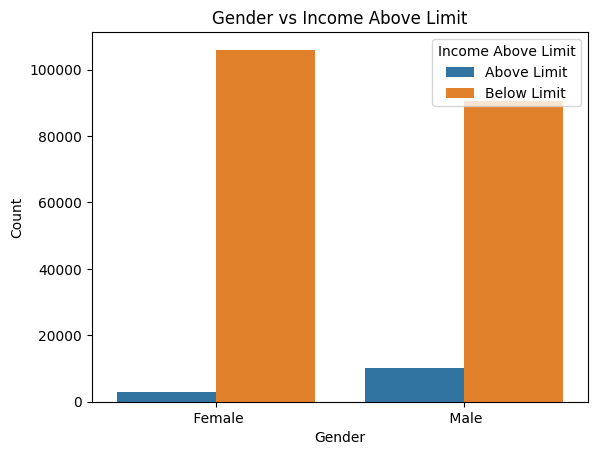

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame with columns 'gender' and 'income_above_limit'
custom_gender = [' Female', ' Male']
ax = sns.countplot(x='gender', hue='income_above_limit', data=train_data)
plt.title('Gender vs Income Above Limit')
plt.xlabel('Gender')
plt.xticks(ticks=[0,1],labels = custom_gender)
plt.ylabel('Count')
ax.legend(title="Income Above Limit", labels=["Above Limit", "Below Limit"])
plt.show()


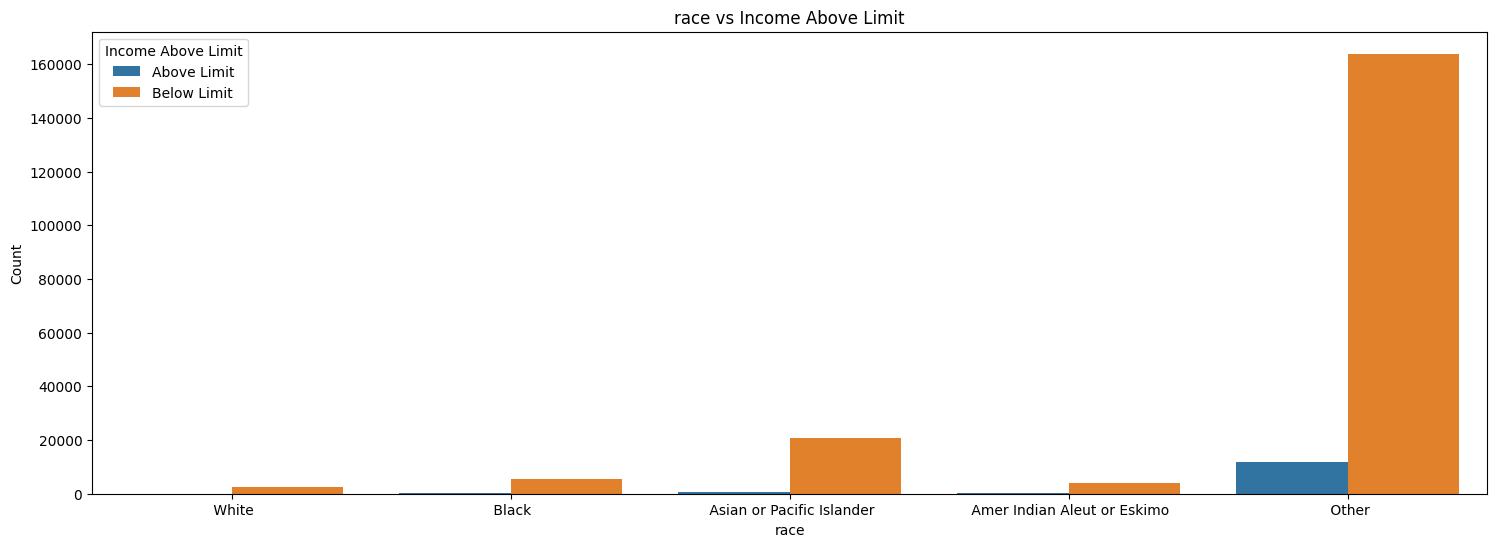

In [94]:
ax = sns.countplot(x='race', hue='income_above_limit', data=train_data)
custom_race = [' White', ' Black', ' Asian or Pacific Islander',' Amer Indian Aleut or Eskimo', ' Other']
plt.xticks(ticks = [0,1,2,3,4], labels = custom_race)
plt.title('race vs Income Above Limit')
plt.xlabel('race')
plt.ylabel('Count')
ax.legend(title="Income Above Limit", labels=["Above Limit", "Below Limit"])
plt.gcf().set_size_inches(18, 6)
plt.show()


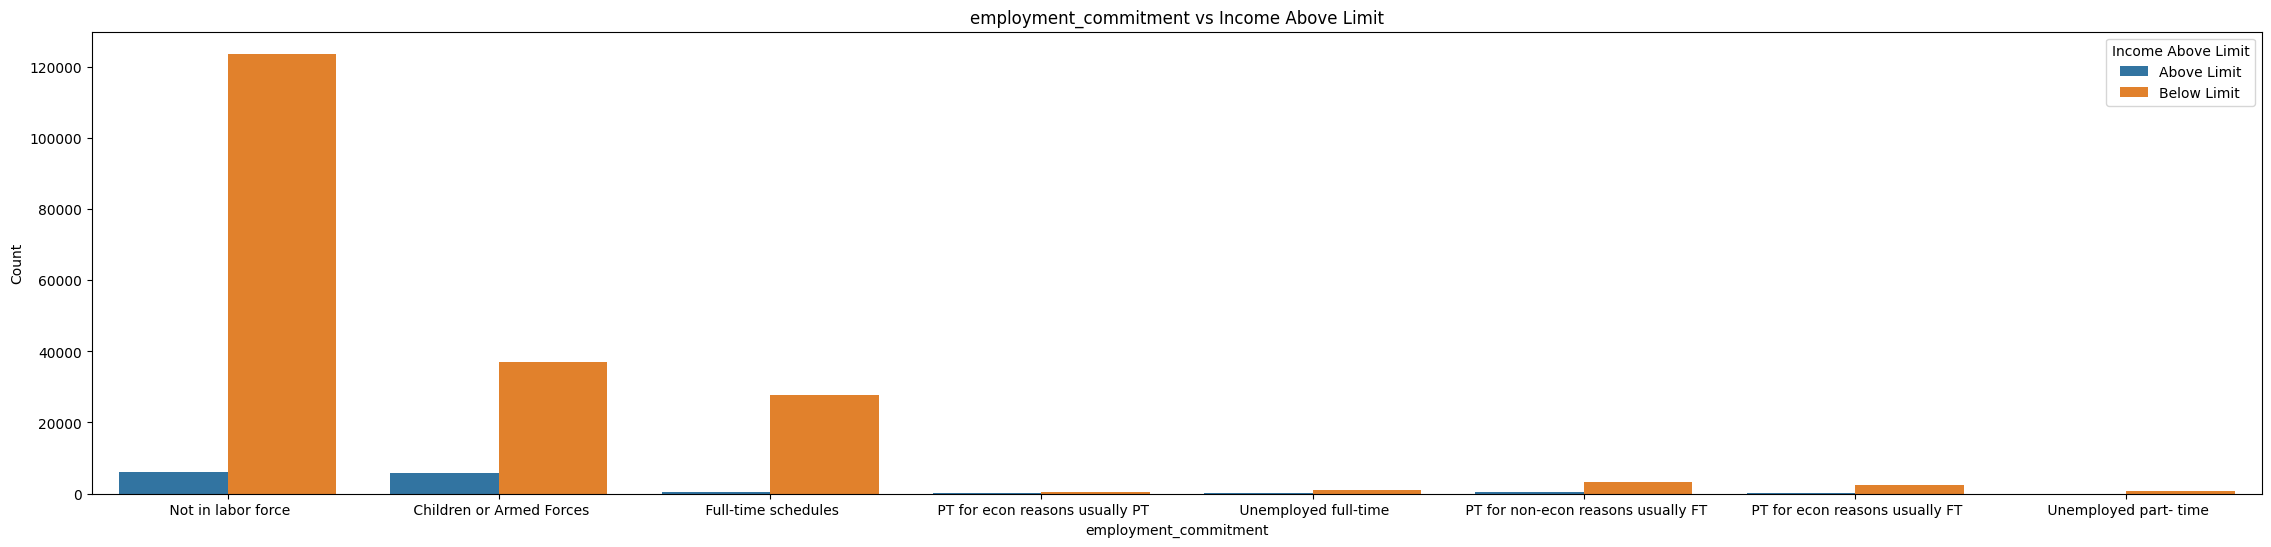

In [95]:
ax = sns.countplot(x='employment_commitment', hue='income_above_limit', data=train_data)
custom_emp = [' Not in labor force', ' Children or Armed Forces',
       ' Full-time schedules', ' PT for econ reasons usually PT',
       ' Unemployed full-time', ' PT for non-econ reasons usually FT',
       ' PT for econ reasons usually FT', ' Unemployed part- time']
plt.title('employment_commitment vs Income Above Limit')
plt.xlabel('employment_commitment')
plt.xticks(ticks = [0,1,2,3,4,5,6,7], labels = custom_emp)
plt.gcf().set_size_inches(28, 6)
ax.legend(title="Income Above Limit", labels=["Above Limit", "Below Limit"])
plt.ylabel('Count')
plt.show()


C:\Users\Devashish Chadha\AppData\Local\Temp\ipykernel_16064\3723822569.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = train_data.groupby(['age_interval', 'income_above_limit']).size().unstack()


<Figure size 1000x600 with 0 Axes>

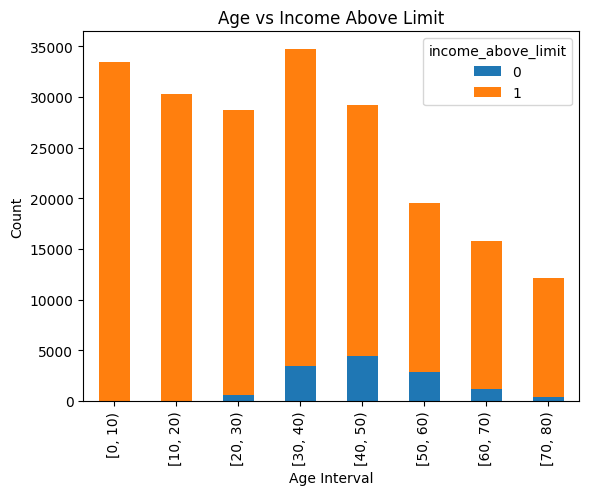

In [96]:

age_intervals = range(0, 90, 10)

# Categorize ages into intervals
train_data['age_interval'] = pd.cut(train_data['age'], bins=age_intervals, right=False)

# Plotting
plt.figure(figsize=(10, 6))

# Grouping by age intervals and income_above_limit, and then counting occurrences
grouped = train_data.groupby(['age_interval', 'income_above_limit']).size().unstack()

# Plotting
grouped.plot(kind='bar', stacked=True)

# Set title and labels
plt.title('Age vs Income Above Limit')
plt.xlabel('Age Interval')
plt.ylabel('Count')

# Show plot
plt.show()


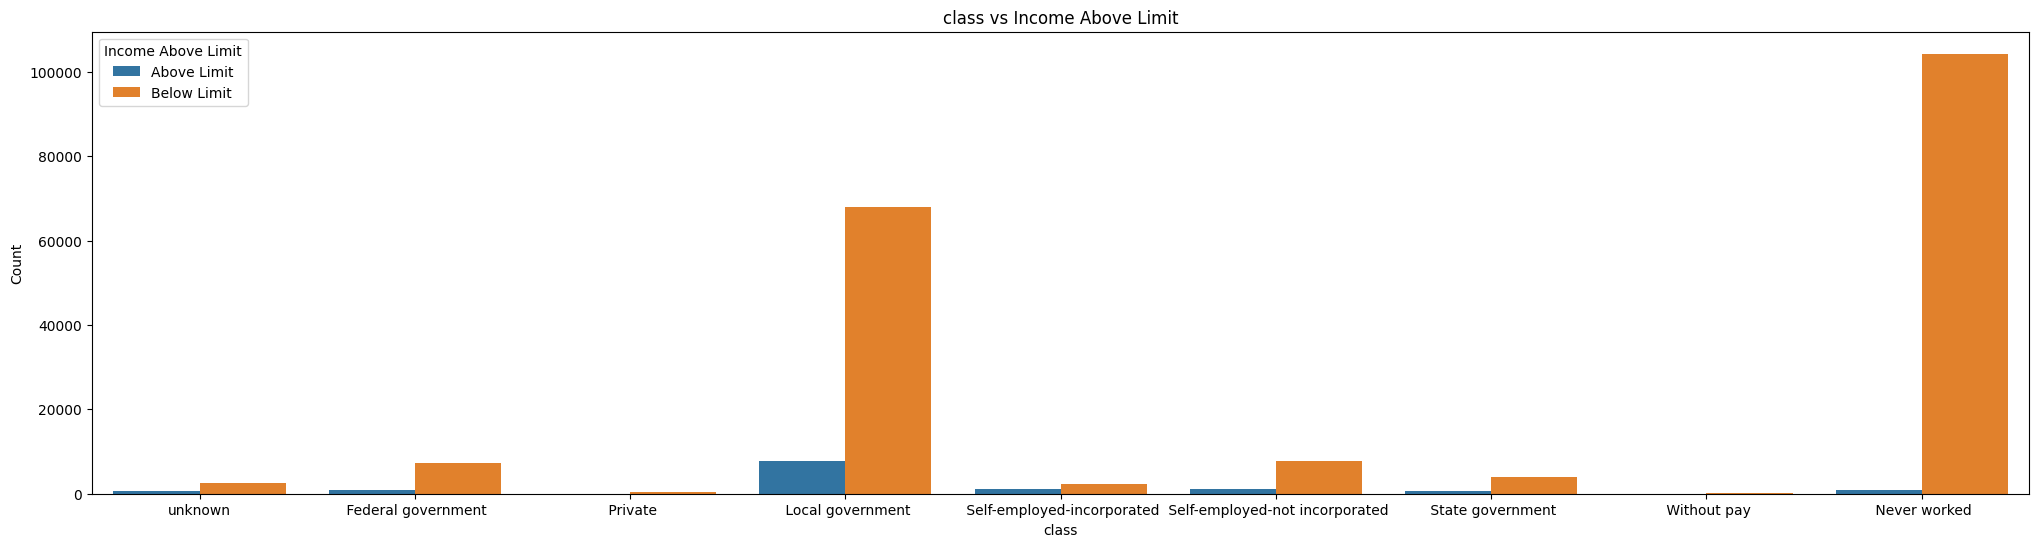

In [97]:
ax = sns.countplot(x='class', hue='income_above_limit', data=train_data)
custom_class = ['unknown',' Federal government', ' Private', ' Local government',
       ' Self-employed-incorporated', ' Self-employed-not incorporated',
       ' State government', ' Without pay', ' Never worked']
plt.title('class vs Income Above Limit')
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8],labels = custom_class)
ax.legend(title="Income Above Limit", labels=["Above Limit", "Below Limit"])
plt.gcf().set_size_inches(25, 6)
plt.show()


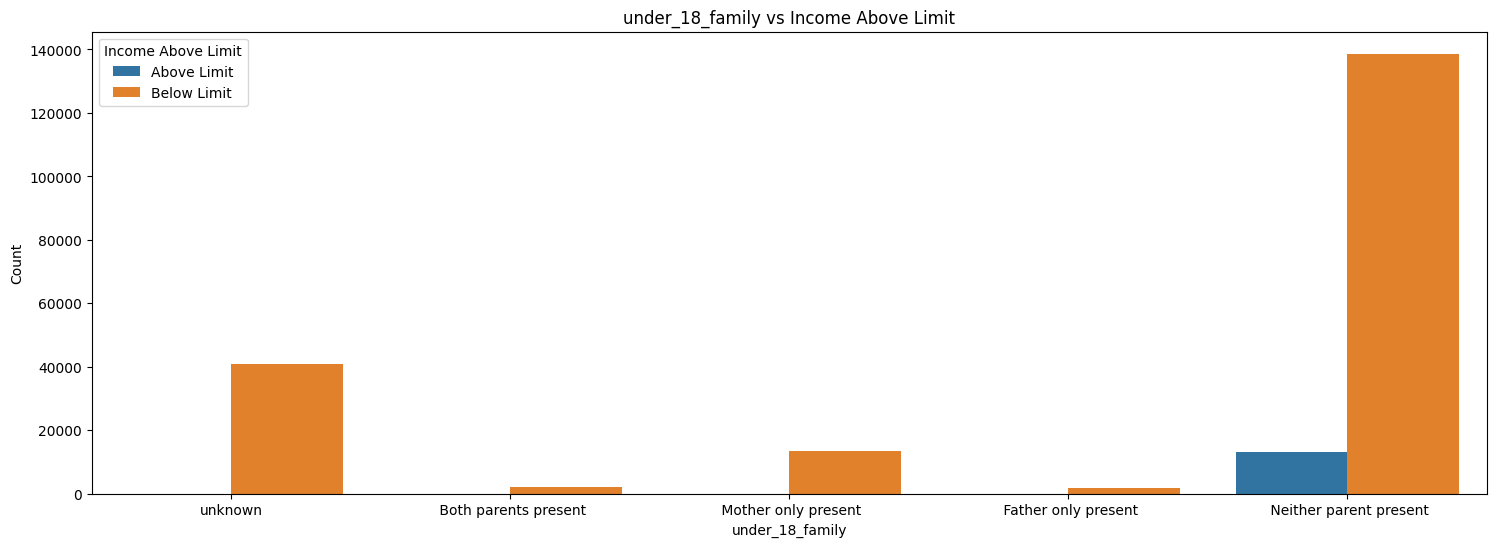

In [98]:
custom_18 = ['unknown', ' Both parents present', ' Mother only present',
       ' Father only present', ' Neither parent present']
ax =sns.countplot(x='under_18_family', hue='income_above_limit', data=train_data)
plt.title('under_18_family vs Income Above Limit')
plt.xlabel('under_18_family')
plt.ylabel('Count')
plt.xticks(ticks = [0,1,2,3,4], labels = custom_18)
plt.gcf().set_size_inches(18, 6)
ax.legend(title="Income Above Limit", labels=["Above Limit", "Below Limit"])
plt.show()
